In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath('..'))
from data.preprocessing import Preprocessor
from data.feature_generation import zpp4_agg_features, zpp4_embed_agg, spec_agg_features, zpp4_preporarion, spec_preporarion
from figures.plots import show_embeddings

pd.set_option('display.max_columns', None)

# import warnings
# warnings.filterwarnings('ignore')

In [2]:
"""
Загрузка данных
"""

# таблица со спецификациями
spec = pd.read_csv('../data/processed_data/specs.csv')
spec['spec_date'] = pd.to_datetime(spec['spec_date'], format='%Y-%m-%d')
spec['delivery_period_end'] = pd.to_datetime(spec['delivery_period_end'], format='%Y-%m-%d')

# таблица с доставками
zpp4 = pd.read_csv('../data/processed_data/zpp4.csv')
zpp4['date'] = pd.to_datetime(zpp4['date'], format='%Y-%m-%d')
zpp4['spec_date'] = pd.to_datetime(zpp4['spec_date'], format='%Y-%m-%d')

In [3]:
"""
Генерация фичей
"""

# фичи аггрегации
spec = zpp4_agg_features(spec, zpp4)

# фичи эмбеддинги
spec = zpp4_embed_agg(spec)

# агрегация из прошлых спецификаций
spec = spec_agg_features(spec, zpp4)

# кумулятивные фичи поставок
zpp4 = zpp4_preporarion(zpp4, spec)

features = [['supplier_lateness', 'supplier_underweight', 'supplier_price_change'],
            [str(i) for i in range(16)],
            ['delivery_length', 'mean_delivery_length', 'delivery_length_diff', 'mean_volume', 'volume_diff', 'conversion']]

C:\Users\vanya\Documents\Programs\ITMO_Sber\data\feature_generation.py:38: RuntimeWarning: divide by zero encountered in scalar divide
  lambda row: int((deliveries['quantity'].sum() / row['volume_contracted']) < 1) if len(


In [4]:
spec.head(2)

,supplier,supplier_status,spec_date,delivery_period_end,option,declared_price,consent_price,spec_price,volume_requested,volume_contracted,bids_submitted,bids_contracted,id,supplier_lateness,supplier_underweight,supplier_price_change,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,delivery_length,is_late,is_underweight,is_poorquality,mean_delivery_length,delivery_length_diff,mean_volume,volume_diff,conversion
0,50 ЛЕТ ОКТЯБРЯ ООО,1.0,2022-12-19,2022-12-25,15.0,25.5,25.0,25.0,40.0,60.0,1.0,1.0,"50 ЛЕТ ОКТЯБРЯ ООО_Юг Руси, АО_2022-12-19",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,50 ЛЕТ ОКТЯБРЯ ООО,1.0,2023-01-24,2023-02-12,15.0,27.5,27.5,27.5,50.0,59.0,1.0,1.0,"50 ЛЕТ ОКТЯБРЯ ООО_Юг Руси, АО_2023-01-24",0.333333,0.000833,-5.3406,-0.343797,-0.207023,0.122023,-0.351381,0.709916,-0.152337,-0.610757,0.14691,-0.80265,0.722523,-0.47786,-0.424774,0.521571,-0.012061,0.157792,0.696974,19,0.0,0.0,0.0,6.0,13.0,40.0,10.0,1.0


In [5]:
zpp4.head(2)

,date,supplier,basis,spec_date,contract_price,estimated_price,contract_price1,estimated_price1,quantity,sum,price_change,id,delivery_period_end,volume_contracted,lateness_percentage,weight_percentage,relative_price_change
0,2022-07-06,Рязанова А.В. ИП Глава К(Ф)Х,"ЮР Валуйский МЭЗ ф-л, ООО",2022-07-06,25.0,24.78,25.0,24.78,27.44,679963.2,-0.88,Рязанова А.В. ИП Глава К(Ф)Х_ЮР Валуйский МЭЗ ...,2022-07-09,30.0,0.0,0.914667,-0.804907
1,2022-07-12,Осипов Л.А. ИП Глава К(Ф)Х,"Юг Руси, АО",2022-07-12,25.0,24.68,25.0,24.55,31.43,771606.5,-1.80,"Осипов Л.А. ИП Глава К(Ф)Х_Юг Руси, АО_2022-07-12",2022-07-22,170.0,0.0,0.184882,-0.332788


In [8]:
spec['n_deliveries'] = spec.apply(lambda row: len(zpp4.loc[zpp4['id'] == row['id']]), axis=1)

<Axes: xlabel='n_deliveries', ylabel='Count'>

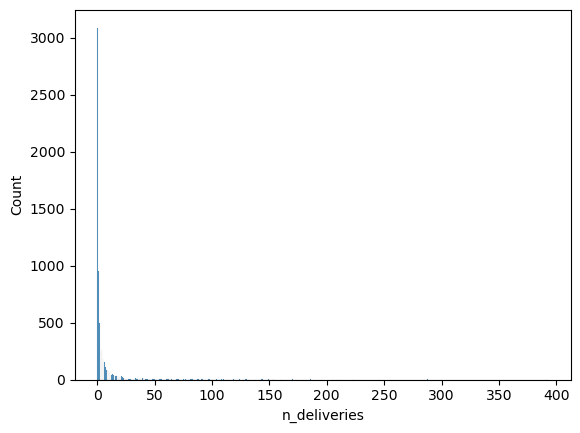

In [9]:
sns.histplot(spec['n_deliveries'])

In [37]:
spec.loc[(spec['n_deliveries'] == 0) & (spec['bids_contracted'] != 1)]

,supplier,supplier_status,spec_date,delivery_period_end,option,declared_price,consent_price,spec_price,volume_requested,volume_contracted,bids_submitted,bids_contracted,id,supplier_lateness,supplier_underweight,supplier_price_change,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,delivery_length,is_late,is_underweight,is_poorquality,mean_delivery_length,delivery_length_diff,mean_volume,volume_diff,conversion,n_deliveries
2,50 ЛЕТ ОКТЯБРЯ ООО,1.0,2023-03-01,2023-03-05,5.0,30.5,30.5,0.0,15.0,0.0,1.0,0.0,"50 ЛЕТ ОКТЯБРЯ ООО_ЮР Успенский филиал, АО_202...",0.271930,-0.004244,-5.151045,-0.355525,-0.233629,0.143005,-0.345431,0.685867,-0.153973,-0.602812,0.153814,-0.800426,0.718692,-0.488148,-0.435661,0.477659,-0.048997,0.164706,0.694948,4,NaN,NaN,NaN,12.5,8.5,45.0,30.0,1.00,0
5,АВАНГАРД ДРУЖБА ООО,1.0,2023-02-07,2023-03-07,10.0,32.0,32.0,0.0,1000.0,0.0,1.0,0.0,"АВАНГАРД ДРУЖБА ООО_ЮР Валуйский МЭЗ ф-л, ООО_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,АВАНГАРД ДРУЖБА ООО,1.0,2023-02-13,2023-03-20,10.0,32.0,31.0,0.0,1000.0,0.0,1.0,0.0,"АВАНГАРД ДРУЖБА ООО_ЮР Валуйский МЭЗ ф-л, ООО_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0
9,АВАНГАРД ООО,1.0,2022-10-28,2022-11-11,10.0,24.0,23.0,0.0,400.0,0.0,1.0,0.0,"АВАНГАРД ООО_Юг Руси, АО_2022-10-28",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
10,АВАНГАРД ООО,1.0,2022-11-08,2022-11-22,10.0,25.0,23.0,0.0,400.0,0.0,1.0,0.0,"АВАНГАРД ООО_Юг Руси, АО_2022-11-08",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6511,Яценко В.В. ИП Глава К(Ф)Х,1.0,2023-05-23,2023-06-06,15.0,22.0,21.5,0.0,100.0,0.0,1.0,0.0,Яценко В.В. ИП Глава К(Ф)Х_ЮР Белокалитвинский...,0.142857,-0.006897,-9.652453,-0.849801,-0.671394,-0.119837,-0.607521,0.646756,-0.446646,-0.974582,0.056726,-0.963579,0.874399,-0.863228,-0.714912,0.641198,-0.237353,0.174037,0.890347,14,NaN,NaN,NaN,24.5,10.5,97.5,2.5,0.50,0
6513,Яцкий И.В. ИП Глава К(Ф)Х,1.0,2022-09-06,2022-09-26,10.0,27.0,27.0,0.0,300.0,0.0,1.0,0.0,"Яцкий И.В. ИП Глава К(Ф)Х_Юг Руси, АО_2022-09-06",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6514,Яцкий И.В. ИП Глава К(Ф)Х,1.0,2022-09-09,2022-09-30,10.0,26.0,25.0,0.0,250.0,0.0,1.0,0.0,"Яцкий И.В. ИП Глава К(Ф)Х_Юг Руси, АО_2022-09-09",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0
6515,Яцкий И.В. ИП Глава К(Ф)Х,1.0,2022-09-30,2022-10-30,10.0,0.0,23.0,0.0,300.0,0.0,1.0,0.0,"Яцкий И.В. ИП Глава К(Ф)Х_Юг Руси, АО_2022-09-30",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0


In [36]:
spec.loc[(spec['n_deliveries'] > 0) & (spec['bids_contracted'] == 0)]

,supplier,supplier_status,spec_date,delivery_period_end,option,declared_price,consent_price,spec_price,volume_requested,volume_contracted,bids_submitted,bids_contracted,id,supplier_lateness,supplier_underweight,supplier_price_change,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,delivery_length,is_late,is_underweight,is_poorquality,mean_delivery_length,delivery_length_diff,mean_volume,volume_diff,conversion,n_deliveries
3347,Луганцев Д.Н. ИП Глава К(Ф)Х,1.0,2023-05-12,2023-05-26,15.0,0.0,11.671429,0.0,300.0,0.0,1.0,0.0,"Луганцев Д.Н. ИП Глава К(Ф)Х_Юг Руси, АО_2023-...",0.610577,0.035380,-1.538464,-0.845055,-0.473497,-0.343013,-0.518177,0.828774,0.369214,-0.979530,0.101514,-0.943939,0.794860,-0.941172,-0.168867,0.702079,-0.703449,0.812041,0.848169,14,1.0,0.0,1.0,35.500000,21.500000,500.000000,200.000000,0.400000,40
4846,СВС-АГРО ООО,0.0,2023-05-10,2023-06-15,5.0,25.0,23.000000,0.0,3000.0,0.0,1.0,0.0,"СВС-АГРО ООО_Юг Руси, АО_2023-05-10",0.933454,-0.013101,-3.215493,-0.881891,-0.505932,-0.543543,-0.530337,0.866137,0.249364,-0.971255,0.052795,-0.940140,0.816061,-0.932701,-0.338474,0.720810,-0.727742,0.803486,0.850115,36,0.0,0.0,0.0,35.092308,0.907692,1300.832308,1699.167692,0.398773,4


## Анализ таблицы ЦК

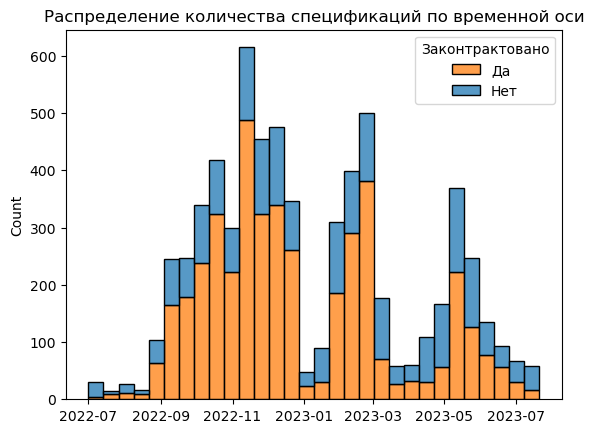

In [66]:
sns.histplot(data=spec, x='spec_date', hue='bids_contracted', multiple='stack').set(
    title='Распределение количества спецификаций по временной оси', xlabel='')
plt.legend(title='Законтрактовано', labels=['Да', 'Нет'])
plt.savefig('../figures/contracted_dist.jpg', bbox_inches='tight')

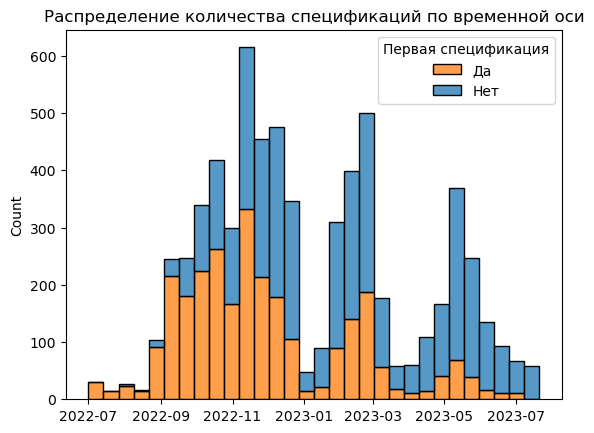

In [67]:
sns.histplot(x=spec['spec_date'], hue=spec['0'].isna(), multiple='stack').set(
    title='Распределение количества спецификаций по временной оси', xlabel='')
plt.legend(title='Первая спецификация', labels=['Да', 'Нет'])
plt.savefig('../figures/first_contract_dist.jpg', bbox_inches='tight')

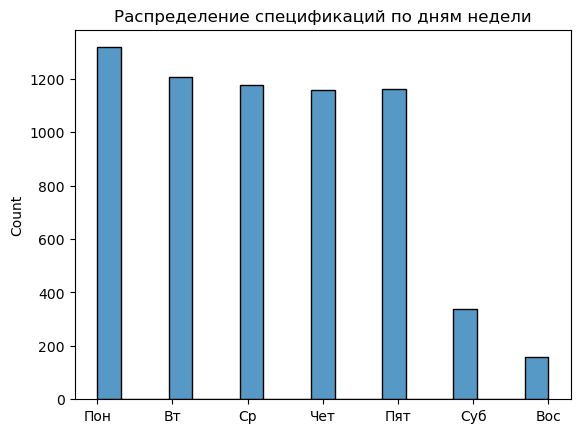

In [16]:
weekdays = ['Пон', 'Вт', 'Ср', 'Чет', 'Пят', 'Суб', 'Вос']
sns.histplot(spec['spec_date'].map(lambda x: x.weekday())).set(
    title='Распределение спецификаций по дням недели',
    xlabel='')
plt.xticks(range(7), weekdays)
plt.show()

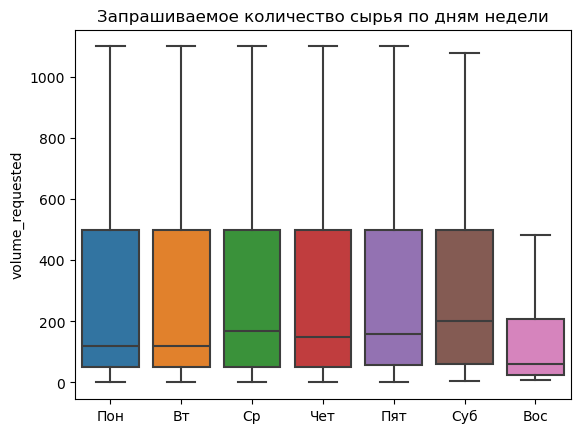

In [17]:
sns.boxplot(x=spec['spec_date'].map(lambda x: x.weekday()), y = spec['volume_requested'], showfliers=False).set(
    title='Запрашиваемое количество сырья по дням недели',
    xlabel='')
plt.xticks(range(7), weekdays)
plt.show()

## Анализ таблицы ZPP4

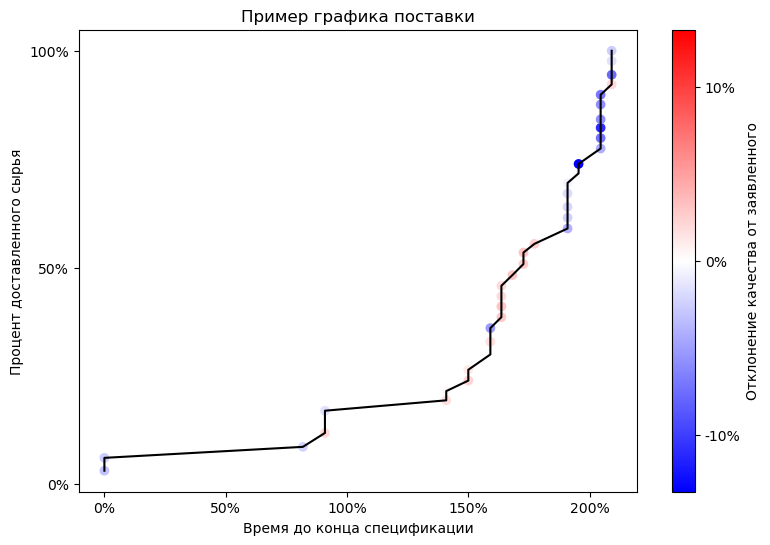

In [26]:
# выбираем историю поставок
history = zpp4[zpp4['id'] == zpp4['id'].unique()[133]]
x = history['lateness_percentage'].values
y = history['weight_percentage'].values
annotation = history['price_change'].values

# настройки графика
plt.figure(figsize=(9, 6))
plt.xlabel('Время до конца спецификации')
plt.ylabel('Процент доставленного сырья')
plt.title('Пример графика поставки')

# сам график
plt.plot(x, y, c='black')

# аннотация (качество сырья)
d = max(abs(annotation.min()), annotation.max())
plt.scatter(x, y, c=annotation, cmap='bwr', vmin=-d, vmax=d)

# добавлем цветной столбик
cbar = plt.colorbar(ticks=[-10, 0, 10])
cbar.set_label('Отклонение качества от заявленного')
cbar.set_ticklabels(['-10%', '0%', '10%'])

# заменяем значения на осях
old_values = [0., 0.5, 1., 1.5, 2.]
new_values = ['0%', '50%', '100%', '150%', '200%']
plt.xticks(old_values, new_values)
plt.yticks(old_values[:3], new_values[:3])

# plt.show()
# plt.savefig('../figures/supplier_spec_history.jpg', bbox_inches='tight')

## Анализ сгенерированных переменных

<Axes: xlabel='is_late', ylabel='supplier_lateness'>

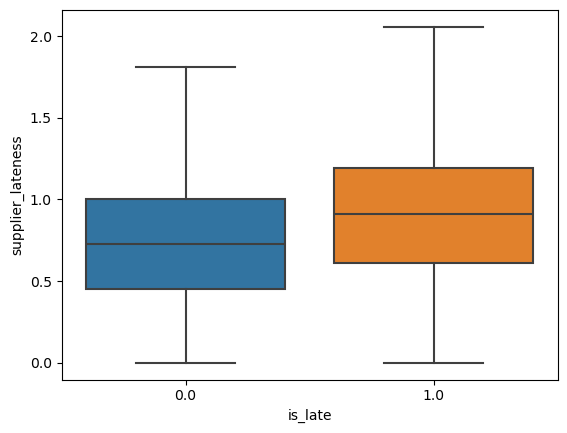

In [46]:
sns.boxplot(x=spec['is_late'], y=spec['supplier_lateness'], showfliers=False)

<Axes: xlabel='is_underweight', ylabel='supplier_underweight'>

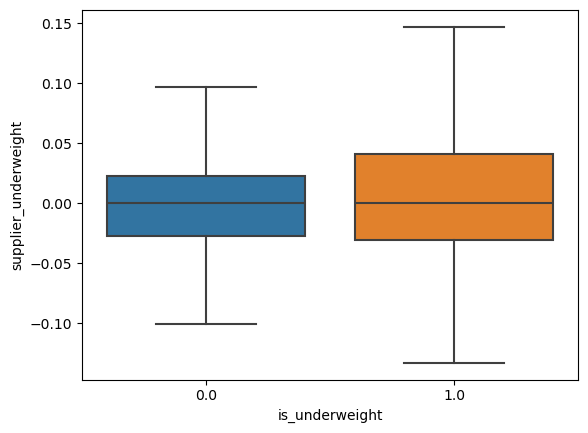

In [47]:
sns.boxplot(x=spec['is_underweight'], y=spec['supplier_underweight'], showfliers=False)

<Axes: xlabel='is_poorquality', ylabel='supplier_price_change'>

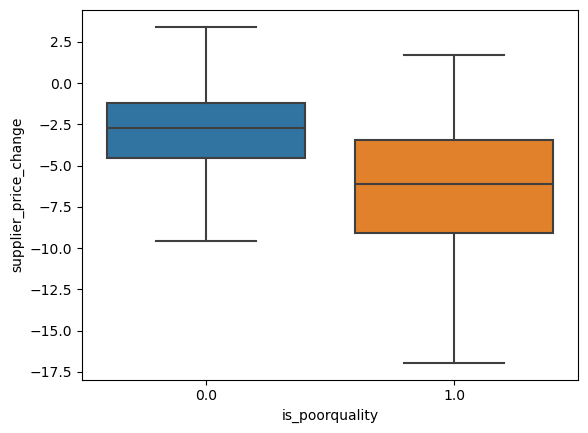

In [48]:
sns.boxplot(x=spec['is_poorquality'], y=spec['supplier_price_change'], showfliers=False)

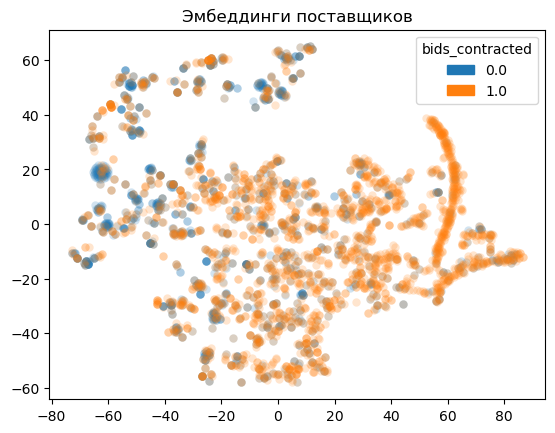

In [34]:
plt.title('Эмбеддинги поставщиков')
temp_spec = spec[~spec['0'].isna()]
show_embeddings(temp_spec[features[1]], temp_spec['bids_contracted'])

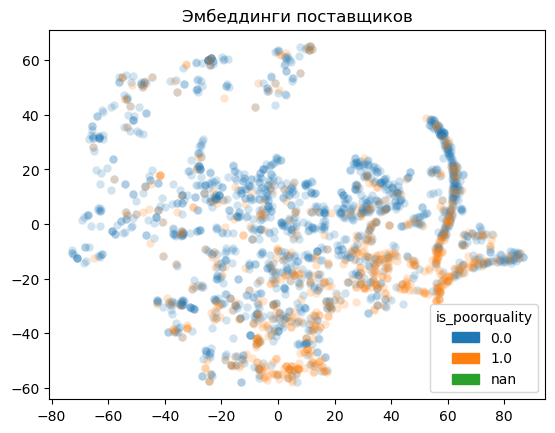

In [42]:
plt.title('Эмбеддинги поставщиков')
temp_spec = spec[~spec['0'].isna()]
show_embeddings(temp_spec[features[1]], temp_spec['is_poorquality'])

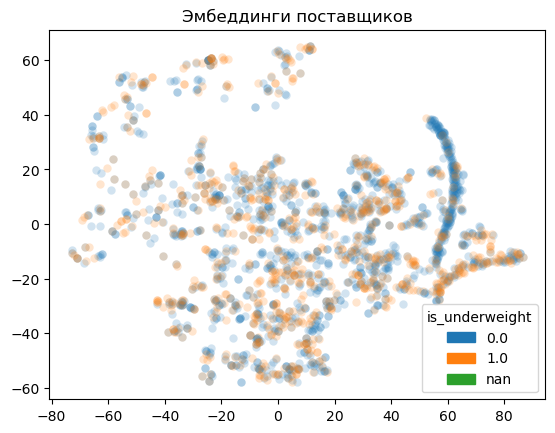

In [43]:
plt.title('Эмбеддинги поставщиков')
temp_spec = spec[~spec['0'].isna()]
show_embeddings(temp_spec[features[1]], temp_spec['is_underweight'])

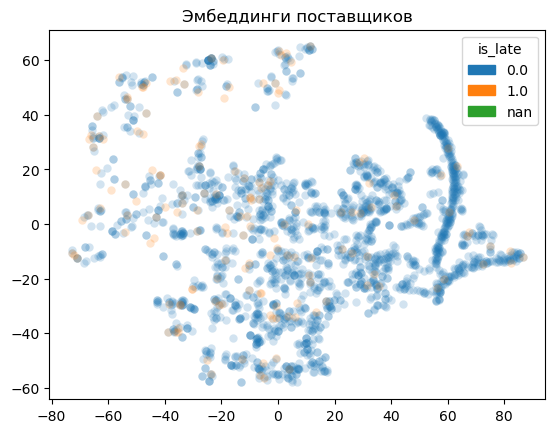

In [44]:
plt.title('Эмбеддинги поставщиков')
temp_spec = spec[~spec['0'].isna()]
show_embeddings(temp_spec[features[1]], temp_spec['is_late'])

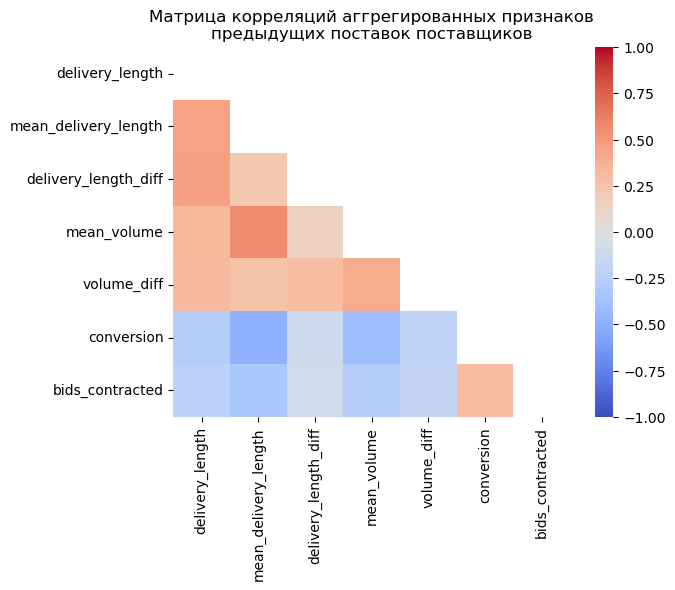

In [93]:
cols = features[2] + ['bids_contracted']
shape_plot = len(cols)
mask = np.zeros((shape_plot, shape_plot))
mask[np.triu_indices_from(mask)] = True

sns.heatmap(spec[cols].corr(), cmap = 'coolwarm', annot = False, 
            mask=mask, vmin=-1, vmax=1).set(
    title='Матрица корреляций аггрегированных признаков\nпредыдущих поставок поставщиков'
            )

plt.savefig('../figures/correlation_matrix.jpg', bbox_inches='tight')
# plt.show()